# Financial Planning with APIs and Simulations

This is a Jupyter notebook that will offer clients a small financial planner for a possible emergency fund based on their current portfolio. And the members will be able to use this tool to forecast a reasonably effective retirement plan based on their current portfolio. We will show this to them with a 10 year and 30 year possible outcome of their portfolio based on different weighting strategies between their stocks and bonds.

There are two financial analysis tools in this notebook:

**Tool 1:** A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

**Tool 2:** A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations. The information from the Monte Carlo simulation will be used to theorize answers about the portfolio and retirement possibilities.

In [1]:
# Imports the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Loads the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Tool 1: A Portfolio Organizer and a Financial Planner for Emergencies

### Step 1: Evaluate the Cryptocurrency Wallet by Using the Requests Library

This first tool will evaluate the current value of a member’s cryptocurrency wallet. It will collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For this prototype, we assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH) and that they earn a monthly income of $12,000.

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income.
monthly_income = 12000

#### Collects the Cryptocurrency Information
*    Note: This information will be retrieved and read in json format.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Using the Python requests library, it will make an API call to access the current price of BTC.
btc_response = requests.get(btc_url).json()

# Uses the json.dumps function to review the response data from the API call.
# Uses the indent and sort_keys parameters to make the response object readable.
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19100512,
            "id": 1,
            "last_updated": 1658535275,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 433583498296,
                    "percent_change_1h": -0.269686045239277,
                    "percent_change_24h": -2.19193648349873,
                    "percent_change_7d": 9.05196547363341,
                    "percentage_change_1h": -0.269686045239277,
                    "percentage_change_24h": -2.19193648349873,
                    "percentage_change_7d": 9.05196547363341,
                    "price": 22677.0,
                    "volume_24h": 40648430399
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19100512,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, it will make an API call to access the current price ETH.
eth_response = requests.get(btc_url).json()

# Uses the json.dumps function to review the response data from the API call.
# Uses the indent and sort_keys parameters to make the response object readable.
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19100512,
            "id": 1,
            "last_updated": 1658535275,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 433583498296,
                    "percent_change_1h": -0.269686045239277,
                    "percent_change_24h": -2.19193648349873,
                    "percent_change_7d": 9.05196547363341,
                    "percentage_change_1h": -0.269686045239277,
                    "percentage_change_24h": -2.19193648349873,
                    "percentage_change_7d": 9.05196547363341,
                    "price": 22677.0,
                    "volume_24h": 40648430399
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19100512,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [8]:
# Navigates the BTC response object to access the current price of BTC.
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Prints the current price of BTC.
print(f"The current price for Bitcoin is ${btc_price: .2f}.")

The current price for Bitcoin is $ 22677.00.


In [9]:
# Navigates the ETH response object to access the current price of ETH.
eth_price = eth_response['data']['1']['quotes']['USD']['price']

# Prints the current price of ETH.
print(f"The current price for Ethereum is ${eth_price: .2f}.")

The current price for Ethereum is $ 22677.00.


#### Evalutes the Wallet Information

In [10]:
# Computes the current value of the BTC holding.
btc_value = btc_price * btc_coins

# Prints current value of the holding in BTC.
print(f"The total current value of your Bitcoin in your cryptocurrency wallet is ${btc_value: .2f}.")

The total current value of your Bitcoin in your cryptocurrency wallet is $ 27212.40.


In [11]:
# Computes the current value of the ETH holding.
eth_value = eth_price * eth_coins

# Prints current value of the holding in ETH.
print(f"The total current value of your Ethereum in your cryptocurrency wallet is ${eth_value: .2f}.")

The total current value of your Ethereum in your cryptocurrency wallet is $ 120188.10.


In [12]:
# Computes the total value of the cryptocurrency wallet by addiing all held cryptocurrency values together.
total_crypto_wallet = btc_value + eth_value

# Prints current cryptocurrency wallet balance.
print(f"The balance of your cryptocurrency wallet is ${total_crypto_wallet: .2f}.")

The balance of your cryptocurrency wallet is $ 147400.50.


### Step 2: Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

This part of the first tool will determine the current value of a member’s stock and bond holdings. It will make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, we assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion.

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

##### **!!Please, make sure you have your .env file set up for this part or the notebook will be unhappy!!**

#### Collects the Stock and Bond information from Alpca

In [14]:
# Sets the variables for the Alpaca API and secret keys.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [14]:
# Creates the Alpaca tradeapi.REST object.
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [18]:
# Sets the tickers for both the bond and stock portion of the portfolio.
tickers = ["SPY","AGG"]

# Sets timeframe to 1Day.
timeframe = "1Day"

# Formats current date as ISO format and sets both the start and end date.
# July 8, 2020 chosen for prototype purposes. It will normally use the previous date.
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [19]:
# Uses the Alpaca get_bars function to get current closing prices for the stocks and bonds.
closing_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [20]:
# Reorganizes the DataFrame to separate ticker data.
SPY = closing_prices_df[closing_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = closing_prices_df[closing_prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenates the ticker DataFrames.
closing_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Updates the index for the `closing_prices_df` DataFrame to retain only the `date` component.
closing_prices_df.index = closing_prices_df.index.date

In [26]:
# Reviews the first 5 rows of the Alpaca DataFrame.
closing_prices_df.head()

SPY                                                           \
              open    high    low   close    volume trade_count        vwap   
2020-08-07  333.29  334.88  332.3  334.57  57282821      350100  333.800372   

               AGG                                                            
              open    high      low   close   volume trade_count        vwap  
2020-08-07  119.66  119.73  119.395  119.43  5559066       15246  119.475306

In [36]:
# Accesses the closing price for AGG from the Alpaca DataFrame.
# Converting the value to a floating point number.
agg_close_price = closing_prices_df["AGG"]
agg_close_price = float(agg_close_price["close"])

# Prints the AGG closing price.
print(f"The closing price for AGG was ${agg_close_price}.")

The closing price for AGG was $119.43.


In [37]:
# Accesses the closing price for SPY from the Alpaca DataFrame.
# Converting the value to a floating point number.
spy_close_price = closing_prices_df["SPY"]
spy_close_price = float(spy_close_price["close"])

# Prints the SPY closing price.
print(f"The closing price for SPY was ${spy_close_price}.")

The closing price for SPY was $334.57.


#### Calculates the Values of the Stocks and Bonds

In [39]:
# Calculates the current value of the bond portion of the portfolio.
agg_value = agg_close_price * agg_shares

# Prints the current value of the bond portfolio
print(f"The current value of the AGG shares is ${agg_value: .2f}.")

The current value of the AGG shares is $ 23886.00.


In [40]:
# Calculates the current value of the stock portion of the portfolio.
spy_value = spy_close_price * spy_shares

# Prints the current value of the stock portfolio.
print(f"The current value of the SPY shares is ${spy_value: .2f}.")

The current value of the SPY shares is $ 36802.70.


In [42]:
# Calculates the total value of the stock and bond portion of the portfolio.
total_stocks_bonds = agg_value + spy_value

# Prints the current balance of the stock and bond portion of the portfolio.
print(f"The total balance of the stock and bond portion of the portfolio is ${total_stocks_bonds: .2f}.")

The total balance of your current portfolio is $ 60688.70.


##### Total Balance

In [43]:
# Calculates the total value of the member's entire savings portfolio by...
    # adding the value of the cryptocurrency wallet to the value of the total stocks and bonds.
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Prints the total portfolio balance.
print(f"The total balance of the entire portfolio is ${total_portfolio: .2f}.")

The total balance of the entire portfolio is $ 208089.20.


### Step 3: Evaluate the Emergency Fund

This part of the tool will use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. This fund should be equal to 3x their current monthly income.

#### Create and Review the Savings Data

In [44]:
# Consolidates financial assets data into a Python list.
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Reviews the Python list savings_data.
savings_data    

[147400.5, 60688.7]

In [69]:
# Creates a Pandas DataFrame called savings_df.
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto", "stock/bond"])

# Displays the savings_df DataFrame.
savings_df

147400.5

60688.7

,amount
crypto,147400.5
stock/bond,60688.7


array([<AxesSubplot:ylabel='amount'>], dtype=object)

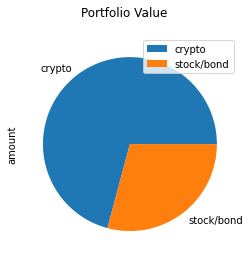

In [110]:
# Plots the total value of the member's portfolio (crypto and stock/bond) in a pie chart.
# This allows the client to have a visual idea of the amount of each asset in the portfolio.
savings_df.plot.pie(subplots = True, title = "Portfolio Value")

#### Emergency Fund

In [71]:
# Creates a variable named emergency_fund_value to hold our pre-described number.
emergency_fund_value = monthly_income * 3

In [111]:
# Evaluates the possibility of creating an emergency fund with 3 conditions...
    # and prints the outcome for the client.
if emergency_fund_value < total_portfolio:
    print("Great news! You have more than enough money in your portfolio to cover a financial emergency fund.")
    
elif emergency_fund_value == total_portfolio:
    print("Great job! Your portfolio is just enough to work as a possible financial emergency fund.")
    
else:
    under_value = emergency_fund_value - total_portfolio
    print(f"You are doing well. Your portfolio is ${under_value} short of working as a possible financial emergency fund.")

Great news! You have more than enough money in your portfolio to cover a financial emergency fund.


## Tool 2: A Financial Planner for Retirement

#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [78]:
# Sets start and end dates of 3 years back from your current date.
# For the prototpye we are using 2020-08-07 and work 3 years back from that date. 
start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [79]:
# Uses the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data.
# The tickers and timeframe parameters were set in Tool 1.
# The start and end dates are updated with the information set above.
sb3year_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [80]:
# Reorganizes the DataFrame and separates ticker data.
SPY = sb3year_prices_df[sb3year_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = sb3year_prices_df[sb3year_prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenates the ticker DataFrames.
sb3year_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Updates the index to retain only the `date` component.
sb3year_prices_df.index = sb3year_prices_df.index.date

# Displays both the first and last five rows of the DataFrame.
display(sb3year_prices_df.head())
display(sb3year_prices_df.tail())

SPY                                                             \
              open    high     low   close     volume trade_count        vwap   
2017-08-07  247.50  247.87  247.37  247.87   31995021      100111  247.668698   
2017-08-08  247.49  248.91  246.83  247.26   61719353      192921  247.739709   
2017-08-09  246.46  247.31  246.06  247.25   62632619      223650  246.791421   
2017-08-10  246.30  246.44  243.70  243.76  120418270      424321  245.027847   
2017-08-11  244.00  244.80  243.75  244.12   74869947      278786  244.222867   

               AGG                                                             
              open    high       low   close   volume trade_count        vwap  
2017-08-07  109.69  109.72  109.6066  109.67  2359826        7755  109.674876  
2017-08-08  109.67  109.69  109.5000  109.57  2570876       12663  109.577636  
2017-08-09  109.87  109.87  109.6600  109.67  2308932       11031  109.771749  
2017-08-10  109.70  109.85  109.6700  109.78  2004163       12437  109.776611  
2017-08-11  109.75  109.94  109.6800  109.87  1913253       10113  109.860974

SPY                                                            \
              open    high     low   close    volume trade_count        vwap   
2020-08-03  328.31  329.62  327.73  328.79  53080454      288008  328.658804   
2020-08-04  327.88  330.06  327.86  330.06  41918004      250900  329.057593   
2020-08-05  331.46  332.39  331.18  332.11  42870955      241416  331.791643   
2020-08-06  331.52  334.46  331.13  334.33  43745653      290039  332.937218   
2020-08-07  333.29  334.88  332.30  334.57  57282821      350100  333.800372   

               AGG                                                              
              open    high       low   close    volume trade_count        vwap  
2020-08-03  119.37  119.40  119.1903  119.40  13014535       36359  119.282420  
2020-08-04  119.42  119.63  119.4200  119.63  10935181       39114  119.541666  
2020-08-05  119.39  119.49  119.3100  119.40  17377874       42313  119.387245  
2020-08-06  119.62  119.73  119.5300  119.57   4608710       15938  119.604199  
2020-08-07  119.66  119.73  119.3950  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [114]:
# Configures the Monte Carlo simulation to forecast 30 years cumulative returns.
# The weights are split 60% to SPY and 40% to AGG and run 500 samples.
MC_thirtyyear = MCSimulation(
    portfolio_data = sb3year_prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30)

# Reviews the simulation input data.
MC_thirtyyear.portfolio_data.head()

SPY                                                             \
              open    high     low   close     volume trade_count        vwap   
2017-08-07  247.50  247.87  247.37  247.87   31995021      100111  247.668698   
2017-08-08  247.49  248.91  246.83  247.26   61719353      192921  247.739709   
2017-08-09  246.46  247.31  246.06  247.25   62632619      223650  246.791421   
2017-08-10  246.30  246.44  243.70  243.76  120418270      424321  245.027847   
2017-08-11  244.00  244.80  243.75  244.12   74869947      278786  244.222867   

                            AGG                                     \
           daily_return    open    high       low   close   volume   
2017-08-07          NaN  109.69  109.72  109.6066  109.67  2359826   
2017-08-08    -0.002461  109.67  109.69  109.5000  109.57  2570876   
2017-08-09    -0.000040  109.87  109.87  109.6600  109.67  2308932   
2017-08-10    -0.014115  109.70  109.85  109.6700  109.78  2004163   
2017-08-11     0.001477  109.75  109.94  109.6800  109.87  1913253   

                                                 
           trade_count        vwap daily_return  
2017-08-07        7755  109.674876          NaN  
2017-08-08       12663  109.577636    -0.000912  
2017-08-09       11031  109.771749     0.000913  
2017-08-10       12437  109.776611     0.001003  
2017-08-11       10113  109.860974     0.000820

In [115]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns.
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990555,0.994759,0.998098,1.001018,0.994635,0.995592,1.000474,1.001794,1.007243,0.999627,...,0.992686,1.000097,1.009438,1.001608,1.001525,1.014238,0.998384,1.000099,0.990241,1.012932
2,0.990342,0.999510,0.995701,0.999157,1.003160,1.000257,0.995598,1.010572,0.986803,1.003001,...,0.989351,0.996637,0.999874,1.001591,0.996465,1.001377,0.998868,1.006960,0.963342,0.997150
3,0.982926,0.989968,1.006806,1.005278,1.013713,1.004364,1.015432,1.019487,0.985499,1.007063,...,0.992112,0.998306,1.016851,1.013786,0.992354,1.002720,1.001345,1.011252,0.952478,0.996343
4,0.993419,0.996155,1.000241,1.006931,1.006915,0.993708,1.020103,1.037963,0.978147,1.003876,...,0.989556,0.988518,1.011013,1.013206,0.992247,1.006550,1.018376,1.013450,0.955005,0.995320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.222510,12.399709,7.918800,9.336121,11.816532,9.006690,17.760538,10.176141,5.072866,4.123073,...,2.780960,12.799251,13.001707,11.339732,9.671679,11.485321,6.513394,9.526286,8.453424,12.351009
7557,12.025351,12.387393,7.970288,9.259430,11.812656,9.018239,18.063641,10.149370,5.050859,4.153447,...,2.808153,12.889704,13.080156,11.262661,9.696772,11.410287,6.494488,9.586737,8.509561,12.371065
7558,12.211313,12.474808,8.024580,9.233736,11.887071,9.026021,17.898174,10.247638,5.148686,4.200077,...,2.860679,13.026356,13.122650,11.081492,9.676630,11.474357,6.529477,9.711842,8.451598,12.447313
7559,12.086457,12.426223,8.001766,9.242169,11.732093,8.979078,17.735834,10.275227,5.090014,4.142135,...,2.846587,13.070480,13.354027,11.157051,9.657180,11.560772,6.578892,9.703180,8.427982,12.536398


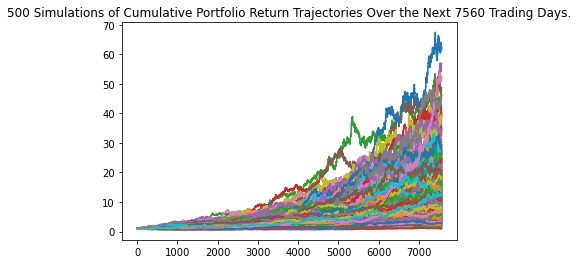

In [117]:
# Visualizes the 30-year Monte Carlo simulation by creating an overlay line plot.
MC_30year_line_plot = MC_thirtyyear.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

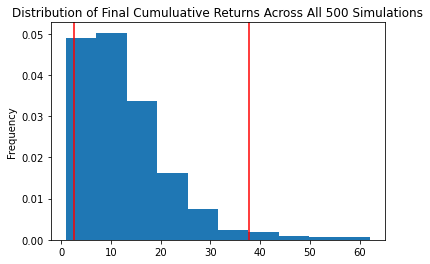

In [118]:
# Visualizes the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram.
MC_30year_dist_plot = MC_thirtyyear.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [119]:
# Generates summary statistics from the 30-year Monte Carlo simulation results and saves them to a variable.
MC30_summary_statistics = MC_thirtyyear.summarize_cumulative_return()


# Reviews the 30-year Monte Carlo summary statistics.
print(MC30_summary_statistics)

count           500.000000
mean             12.889470
std               9.123021
min               0.915085
25%               6.407826
50%              10.207227
75%              17.015080
max              62.138603
95% CI Lower      2.472758
95% CI Upper     37.821803
Name: 7560, dtype: float64


In [120]:
# FutureWarning: The series.append method is depreciated and will be removed from pandas in a future version. Use pandas.concat instead.
  # return metrics.append(ci_series)

#### Step 5: Analyze the Retirement Portfolio Forecasts.

In [121]:
# Prints the current balance of the stock and bond portion of the members portfolio.
print(f"Current balance of the Stock/Bond portion of the portfolio: ${total_stocks_bonds: .2f}.")

Current balance of the Stock/Bond portion of the portfolio: $ 60688.70.


In [122]:
# Uses the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio.
ci_lower_thirty_cumulative_return = MC30_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC30_summary_statistics[9] * total_stocks_bonds

# Prints the result of your calculations.
print(f"There is a 95% chance that the portfolio over the next 30 years will end within in the range of "
      f"${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")

There is a 95% chance that the portfolio over the next 30 years will end within in the range of $ 150068.48 and $ 2295356.05.


### Repeating Forecast of Cumulative Returns for 10 Years

#### Step 1: Using same data from before.

#### Step 2: Run a Monte Carlo simulation of 500 samples and 10 years for the 80/20 portfolio, and then plot the results.

In [95]:
# Configures a Monte Carlo simulation to forecast 10 years cumulative returns.
# The weights should be split 80% to SPY and 20% to AGG and run 500 samples.
MC_tenyear = MCSimulation(
    portfolio_data = sb3year_prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10)

# Reviews the simulation input data.
MC_thirtyyear.portfolio_data.head()

SPY                                                             \
              open    high     low   close     volume trade_count        vwap   
2017-08-07  247.50  247.87  247.37  247.87   31995021      100111  247.668698   
2017-08-08  247.49  248.91  246.83  247.26   61719353      192921  247.739709   
2017-08-09  246.46  247.31  246.06  247.25   62632619      223650  246.791421   
2017-08-10  246.30  246.44  243.70  243.76  120418270      424321  245.027847   
2017-08-11  244.00  244.80  243.75  244.12   74869947      278786  244.222867   

                            AGG                                     \
           daily_return    open    high       low   close   volume   
2017-08-07          NaN  109.69  109.72  109.6066  109.67  2359826   
2017-08-08    -0.002461  109.67  109.69  109.5000  109.57  2570876   
2017-08-09    -0.000040  109.87  109.87  109.6600  109.67  2308932   
2017-08-10    -0.014115  109.70  109.85  109.6700  109.78  2004163   
2017-08-11     0.001477  109.75  109.94  109.6800  109.87  1913253   

                                                 
           trade_count        vwap daily_return  
2017-08-07        7755  109.674876          NaN  
2017-08-08       12663  109.577636    -0.000912  
2017-08-09       11031  109.771749     0.000913  
2017-08-10       12437  109.776611     0.001003  
2017-08-11       10113  109.860974     0.000820

In [97]:
# Runs the Monte Carlo simulation to forecast 10 years cumulative returns.
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989309,0.997096,1.004026,0.999046,1.001133,1.010959,1.026856,0.998756,1.002001,0.999839,...,0.993996,0.988978,1.014799,0.997621,0.995105,1.013688,1.008123,1.005597,0.968925,1.005515
2,0.988052,1.016582,1.000674,1.008895,0.997255,1.001107,1.042347,1.002964,1.002898,0.992312,...,0.996258,0.976044,1.027403,1.002711,1.006713,1.000324,1.006407,1.010878,0.968806,1.012759
3,0.983345,1.048018,0.978217,1.024031,1.001249,1.015370,1.050638,1.017189,1.007660,1.021655,...,0.985980,0.972844,1.039933,1.023320,0.991793,0.996128,1.008944,1.015820,0.962920,1.002865
4,0.988782,1.061945,0.973049,1.025154,0.979641,1.017561,1.037085,0.988877,1.018728,1.030622,...,0.978840,0.995910,1.051610,1.020918,0.981326,0.962382,1.008488,1.026090,0.948099,0.992550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.542801,0.566865,3.830691,2.170888,1.134255,1.110921,1.136122,2.642313,1.943828,2.323150,...,2.146432,2.475087,1.726862,3.795245,3.514357,2.808554,2.706195,2.799747,2.976173,2.404925
2517,2.565685,0.574466,3.825098,2.163398,1.153608,1.115523,1.127669,2.596454,1.928506,2.349210,...,2.120417,2.492179,1.705536,3.824802,3.474903,2.865593,2.688005,2.809536,3.003180,2.417519
2518,2.605404,0.580311,3.842931,2.136233,1.123462,1.105698,1.150040,2.578421,1.926478,2.351799,...,2.140556,2.507384,1.681505,3.788401,3.522766,2.896700,2.699039,2.838262,2.999103,2.381665
2519,2.638139,0.588261,3.854242,2.140562,1.129366,1.126070,1.137381,2.582076,1.928706,2.357510,...,2.160149,2.463882,1.720917,3.833826,3.467159,2.865531,2.692266,2.875069,3.064036,2.394873


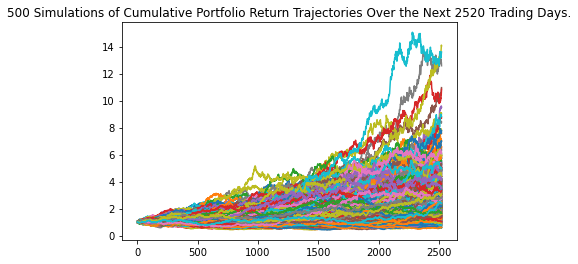

In [98]:
# Visualizes the 10-year Monte Carlo simulation by creating an overlay line plot.
MC_10year_line_plot = MC_tenyear.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

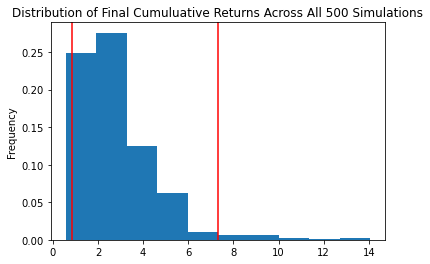

In [100]:
# Visualizes the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram.
MC_10year_dist_plot = MC_tenyear.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [103]:
# Generates summary statistics from the 10-year Monte Carlo simulation result and saves them to a variable.
MC10_summary_statistics = MC_tenyear.summarize_cumulative_return()

# Reviews the 10-year Monte Carlo summary statistics
print(MC10_summary_statistics)

count           500.000000
mean              2.834660
std               1.766048
min               0.572419
25%               1.683489
50%               2.442720
75%               3.509526
max              14.059609
95% CI Lower      0.831923
95% CI Upper      7.324824
Name: 2520, dtype: float64


In [ ]:
# FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  # return metrics.append(ci_series)

#### Step 5: Analyze the Retirement Portfolio Forecasts.

In [ ]:
# Prints the current balance of the stock and bond portion of the members portfolio.
print(f"Current balance of the Stock/Bond portion of the portfolio: ${total_stocks_bonds: .2f}.")

In [106]:
# Uses the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio.
ci_lower_ten_cumulative_return = MC10_summary_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC10_summary_statistics[9] * total_stocks_bonds

# Prints the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 10 years will end within in the range of "
      f"${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")

There is a 95% chance that the portfolio over the next 10 years will end within in the range of $ 50488.31 and $ 444534.02.
